# Modeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df = pd.read_csv('../data/processed/feature_engineered.csv')
print("Data loaded:", df.shape)
print(df.head())

Data loaded: (205, 13)
   symboling  curbweight  horsepower  compressionratio   citympg     price  \
0   1.743470   -0.014566    0.174483         -0.288349 -0.646553  9.510149   
1   1.743470   -0.014566    0.174483         -0.288349 -0.646553  9.711176   
2   0.133509    0.514882    1.264536         -0.288349 -0.953012  9.711176   
3   0.938490   -0.420797   -0.053668         -0.035973 -0.186865  9.543306   
4   0.938490    0.516807    0.275883         -0.540725 -1.106241  9.767152   

   fueltype_gas  carbody_hardtop  carbody_hatchback  carbody_sedan  \
0          True            False              False          False   
1          True            False              False          False   
2          True            False               True          False   
3          True            False              False           True   
4          True            False              False           True   

   carbody_wagon  drivewheel_fwd  drivewheel_rwd  
0          False           False    

In [5]:
X = df.drop('price', axis=1)
y = df['price']
print("X shape:", X.shape)
print('--------')
print("y shape:", y.shape)
print('--------')
print(X.columns[:10])
print('--------')
print(y.head())

X shape: (205, 12)
--------
y shape: (205,)
--------
Index(['symboling', 'curbweight', 'horsepower', 'compressionratio', 'citympg',
       'fueltype_gas', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon'],
      dtype='object')
--------
0    9.510149
1    9.711176
2    9.711176
3    9.543306
4    9.767152
Name: price, dtype: float64


RMSE: 0.20296198681546865, R2: 0.848153746512098


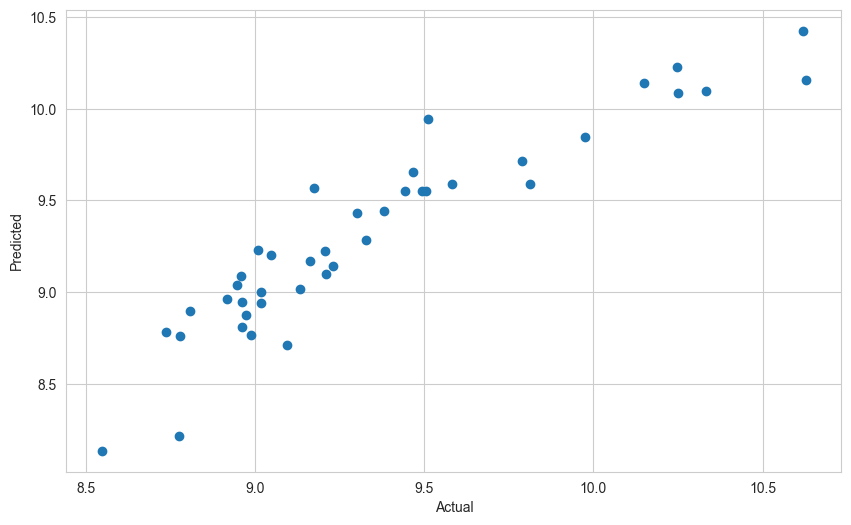

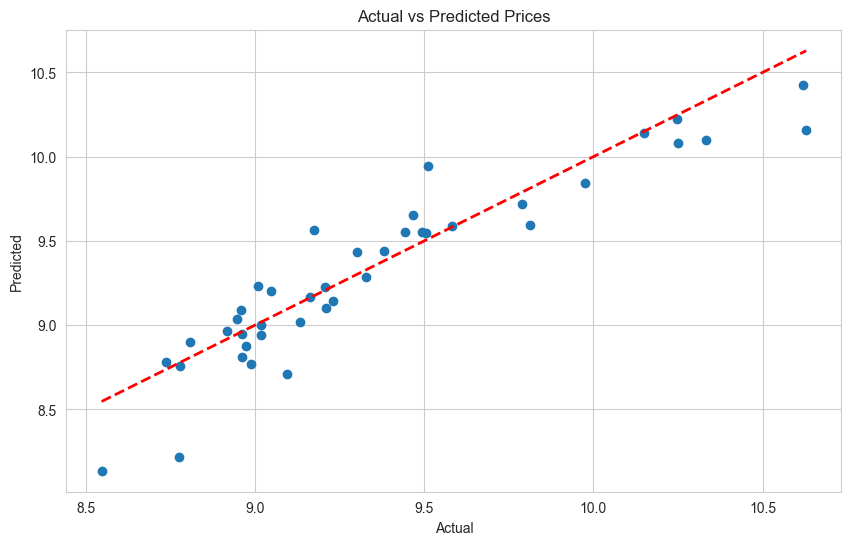

[ 0.00078002  0.21022518  0.1310303   0.21789809 -0.15975532  0.46994989
 -0.10385823 -0.30249653 -0.19449684 -0.34840567  0.04384459  0.07295796]


In [8]:
# Train / Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}, R2: {r2}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()
print(model.coef_)


In [15]:
# Coefficient analysis - user friendly
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)
print('----------------------------------')
# Most impact to make expensive
print("- Most impact positive", coef_df.iloc[0]['Feature'], coef_df.iloc[0]['Coefficient'])

# Most impact to make cheap
print("- Most impact negative", coef_df.iloc[-1]['Feature'], coef_df.iloc[-1]['Coefficient'])

              Feature  Coefficient
5        fueltype_gas     0.469950
3    compressionratio     0.217898
1          curbweight     0.210225
2          horsepower     0.131030
11     drivewheel_rwd     0.072958
10     drivewheel_fwd     0.043845
0           symboling     0.000780
6     carbody_hardtop    -0.103858
4             citympg    -0.159755
8       carbody_sedan    -0.194497
7   carbody_hatchback    -0.302497
9       carbody_wagon    -0.348406
----------------------------------
- Most impact positive fueltype_gas 0.46994989116814556
- Most impact negative carbody_wagon -0.34840567164706754
